In [1]:
import pandas as pd
import numpy as np
import recruit_utils

import pdvega
from mpl_toolkits.basemap import Basemap
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

import statsmodels.api as sm
from statsmodels.graphics.regressionplots import *
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf, kpss
from sklearn import cluster

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline

In [3]:
# Import data into pandas data frames
data, stores = recruit_utils.import_data()

recruit_utils.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['tra']['visitor_diff'][mask] = np.nan
recruit_utils.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['tra']['log_visitor_diff'][mask] = np.nan


In [4]:
# Transform data and stores into train and test data frames
train, test = recruit_utils.create_train_test(data, stores)

In [5]:
# Inspect the training data
train.head()

,air_store_id,visit_date,visitors,log_visitors,dow,wom,year,month,day,visitor_diff,...,rv2_y,id,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2
0,air_00a91d42b08b08d9,2016-07-01,35,3.555348,4,1,2016,7,1,-1.0,...,1.0,air_00a91d42b08b08d9_2016-07-01,-1.0,-1.0,-1.0,20160701,8.326629,4.519803,175.447598,0
1,air_00a91d42b08b08d9,2016-07-02,9,2.197225,5,1,2016,7,2,-26.0,...,-1.0,air_00a91d42b08b08d9_2016-07-02,-1.0,-1.0,-1.0,20160702,8.326629,4.519803,175.447598,0
2,air_00a91d42b08b08d9,2016-07-04,20,2.995732,0,1,2016,7,4,11.0,...,-1.0,air_00a91d42b08b08d9_2016-07-04,-1.0,-1.0,-1.0,20160704,8.326629,4.519803,175.447598,0
3,air_00a91d42b08b08d9,2016-07-05,25,3.218876,1,1,2016,7,5,5.0,...,-1.0,air_00a91d42b08b08d9_2016-07-05,-1.0,-1.0,-1.0,20160705,8.326629,4.519803,175.447598,0
4,air_00a91d42b08b08d9,2016-07-06,29,3.367296,2,1,2016,7,6,4.0,...,7.0,air_00a91d42b08b08d9_2016-07-06,-1.0,-1.0,-1.0,20160706,8.326629,4.519803,175.447598,0


In [6]:
train.shape

(252108, 60)

In [7]:
train.describe()

,visitors,log_visitors,dow,wom,year,month,day,visitor_diff,log_visitor_diff,day_of_week,...,rs2_y,rv2_y,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2
count,252108.000000,252108.000000,252108.000000,252108.000000,252108.000000,252108.000000,252108.000000,252108.000000,252108.000000,252108.000000,...,252108.000000,252108.000000,252108.000000,252108.000000,252108.000000,2.521080e+05,252108.000000,252108.000000,252108.000000,252108.000000
mean,20.973761,2.706059,3.019678,2.678582,2016.307697,6.208200,15.591830,0.011206,-0.002592,2.987228,...,-0.604422,-0.706806,-0.473611,-0.867509,-0.830113,2.016371e+07,8.353065,6.860945,171.835624,412.701513
std,16.757007,0.907205,1.923985,1.251037,0.461542,3.680263,8.670745,16.526870,0.896659,2.033470,...,2.375366,1.620808,4.345131,1.082836,1.478630,4.372124e+03,2.158952,3.706457,14.921842,239.698964
min,1.000000,0.000000,0.000000,1.000000,2016.000000,1.000000,1.000000,-860.000000,-5.062595,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.016010e+07,-1.000000,-1.000000,-1.000000,0.000000
25%,9.000000,2.197225,1.000000,2.000000,2016.000000,3.000000,8.000000,-7.000000,-0.470004,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.016072e+07,8.326629,4.521799,169.985683,205.000000
50%,17.000000,2.833213,3.000000,3.000000,2016.000000,7.000000,16.000000,0.000000,0.000000,3.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.016102e+07,8.362564,4.601440,175.339634,406.000000
75%,29.000000,3.367296,5.000000,4.000000,2017.000000,10.000000,23.000000,7.000000,0.470004,5.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.017012e+07,9.325508,8.931834,175.442512,623.000000
max,877.000000,6.776507,6.000000,5.000000,2017.000000,12.000000,31.000000,866.000000,5.568345,6.000000,...,90.000000,100.000000,264.000000,62.000000,80.000000,2.017042e+07,10.808664,14.077843,188.294030,828.000000


In [8]:
# Inspect the test data
test.head()

,id,visitors,visit_date,air_store_id,log_visitors,dow,wom,year,month,day,...,rs2_y,rv2_y,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2
0,air_00a91d42b08b08d9_2017-04-23,0,2017-04-23,air_00a91d42b08b08d9,0,6,4,2017,4,23,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170423,8.326629,4.519803,175.447598,0
1,air_00a91d42b08b08d9_2017-04-24,0,2017-04-24,air_00a91d42b08b08d9,0,0,4,2017,4,24,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170424,8.326629,4.519803,175.447598,0
2,air_00a91d42b08b08d9_2017-04-25,0,2017-04-25,air_00a91d42b08b08d9,0,1,4,2017,4,25,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170425,8.326629,4.519803,175.447598,0
3,air_00a91d42b08b08d9_2017-04-26,0,2017-04-26,air_00a91d42b08b08d9,0,2,4,2017,4,26,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170426,8.326629,4.519803,175.447598,0
4,air_00a91d42b08b08d9_2017-04-27,0,2017-04-27,air_00a91d42b08b08d9,0,3,4,2017,4,27,...,-1.0,-1.0,-1.0,-1.0,-1.0,20170427,8.326629,4.519803,175.447598,0


In [9]:
test.shape

(32019, 60)

In [10]:
test.describe()

,visitors,log_visitors,dow,wom,year,month,day,visitor_diff,log_visitor_diff,day_of_week,...,rs2_y,rv2_y,total_reserv_sum,total_reserv_mean,total_reserv_dt_diff_mean,date_int,var_max_lat,var_max_long,lon_plus_lat,air_store_id2
count,32019.0,32019.0,32019.000000,32019.000000,32019.0,32019.000000,32019.000000,32019.0,32019.0,32019.000000,...,32019.000000,32019.000000,32019.000000,32019.000000,32019.000000,3.201900e+04,32019.000000,32019.000000,32019.000000,32019.000000
mean,0.0,0.0,2.923077,3.051282,2017.0,4.794872,18.153846,0.0,0.0,3.076923,...,-0.832153,-0.934794,-0.908398,-0.964198,-0.904413,2.017050e+07,8.386876,6.861834,173.045321,413.711328
std,0.0,0.0,2.042964,1.319475,0.0,0.403802,9.090961,0.0,0.0,2.004956,...,1.933239,0.847254,1.504344,0.574352,1.426836,3.702412e+01,2.058665,3.641456,5.213828,238.827977
min,0.0,0.0,0.000000,1.000000,2017.0,4.000000,1.000000,0.0,0.0,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.017042e+07,0.000000,0.000000,163.752875,0.000000
25%,0.0,0.0,1.000000,2.000000,2017.0,5.000000,10.000000,0.0,0.0,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.017050e+07,8.326629,4.521799,170.079161,208.000000
50%,0.0,0.0,3.000000,3.000000,2017.0,5.000000,20.000000,0.0,0.0,3.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.017051e+07,8.362564,4.588406,175.339634,413.000000
75%,0.0,0.0,5.000000,4.000000,2017.0,5.000000,26.000000,0.0,0.0,5.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.017052e+07,9.325508,8.931834,175.442512,619.000000
max,0.0,0.0,6.000000,5.000000,2017.0,5.000000,31.000000,0.0,0.0,6.000000,...,53.000000,35.000000,54.000000,27.000000,49.500000,2.017053e+07,10.808664,14.077843,188.294030,828.000000


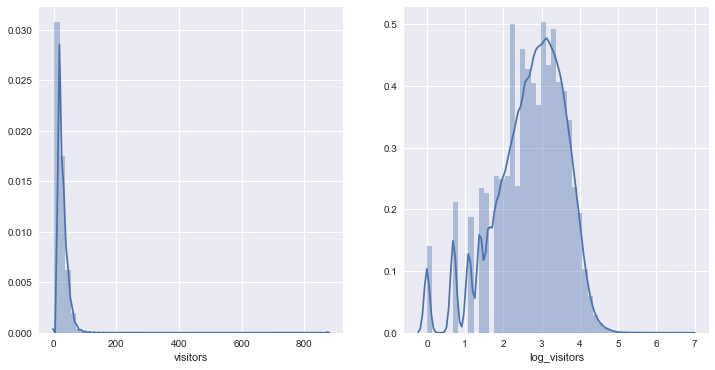

In [11]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.distplot(train['visitors'], ax=axs[0])
sns.distplot(train['log_visitors'], ax=axs[1])

In [12]:
# Define list of main predictor variables for visualizations
categorical_vars = ['dow', 'wom', 'year', 'month', 'day', 'day_of_week', 'holiday_flg', 
                    'air_genre_name', 'air_area_name', 'air_store_id2', 'cluster']

numeric_vars = ['min_visitors', 'mean_visitors', 'median_visitors', 'max_visitors',
                'count_observations', 'rs1_x', 'rv1_x', 'rs2_x', 'rv2_x', 'rs1_y',
                'rv1_y', 'rs2_y', 'rv2_y', 'total_reserv_sum', 'total_reserv_mean',
                'total_reserv_dt_diff_mean']

targets = ['visitors', 'log_visitors', 'visitor_diff', 'log_visitor_diff']

In [13]:
subset = [targets[1]] + numeric_vars

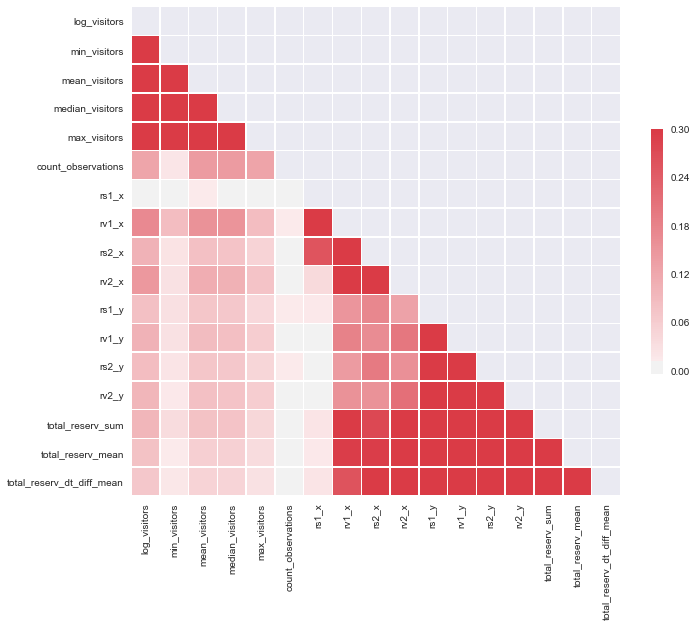

In [14]:
corr = train[subset].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

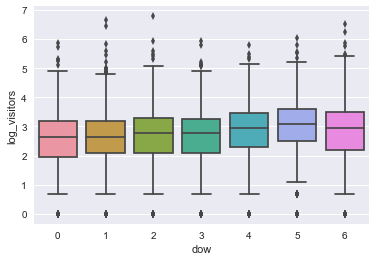

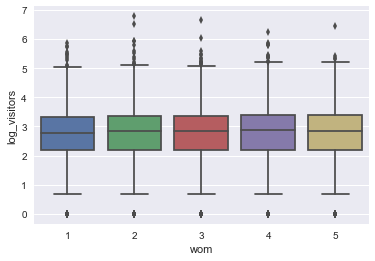

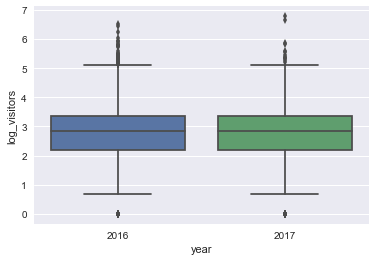

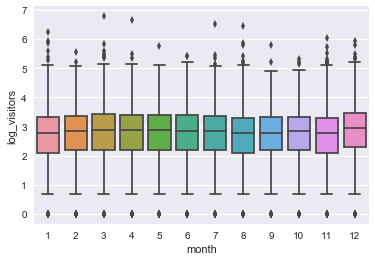

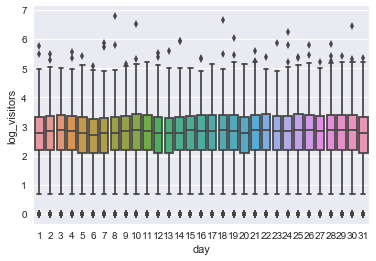

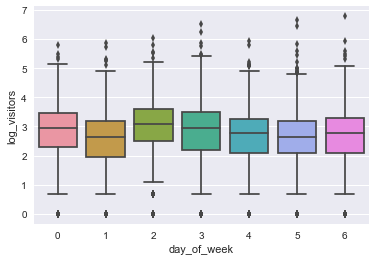

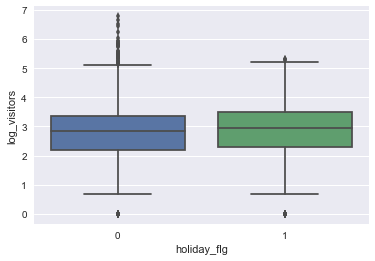

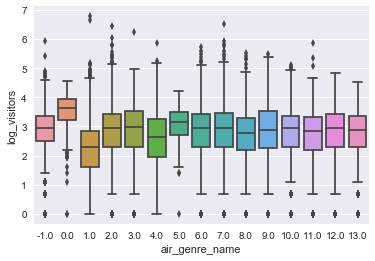

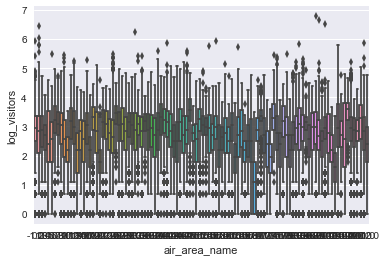

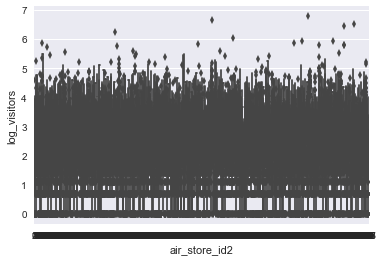

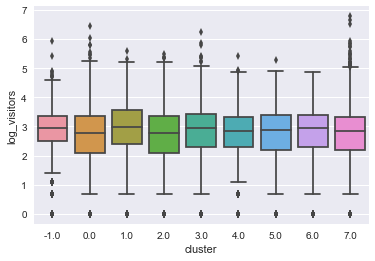

In [15]:
for i, cat in enumerate(categorical_vars):
    plt.figure(i)
    sns.boxplot(x=cat, y=targets[1], data=train)

In [16]:
y = train[targets[1]]
X = train[numeric_vars]

lm = sm.OLS(y, X).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           log_visitors   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.031e+05
Date:                Sat, 03 Feb 2018   Prob (F-statistic):               0.00
Time:                        16:37:24   Log-Likelihood:            -2.9045e+05
No. Observations:              252108   AIC:                         5.809e+05
Df Residuals:                  252092   BIC:                         5.811e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
min_visitors          

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [18]:
vif.round(1)

,VIF Factor,features
0,4.0,min_visitors
1,263.5,mean_visitors
2,205.8,median_visitors
3,6.6,max_visitors
4,5.1,count_observations
5,2.0,rs1_x
6,3.9,rv1_x
7,2.2,rs2_x
8,3.5,rv2_x
9,4.4,rs1_y


In [19]:
tmp1 = train.copy()
tmp1['data_set'] = 'Train'
tmp2 = test.copy()
tmp2['data_set'] = 'Test'
combined = pd.concat([tmp1, tmp2])
del(tmp1)
del(tmp2)

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


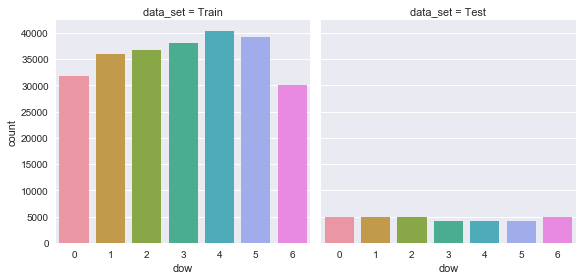

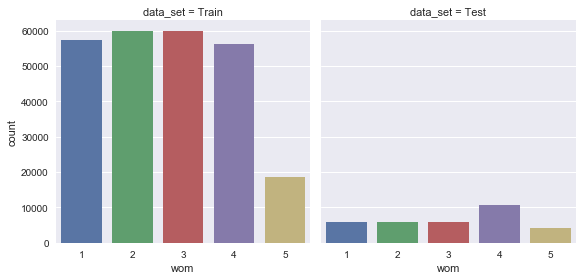

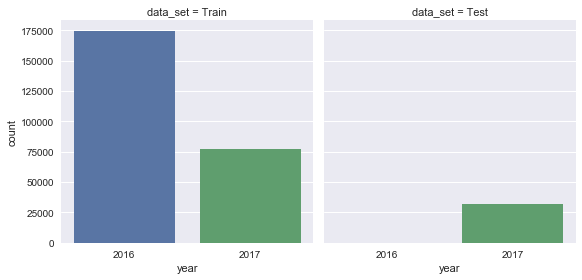

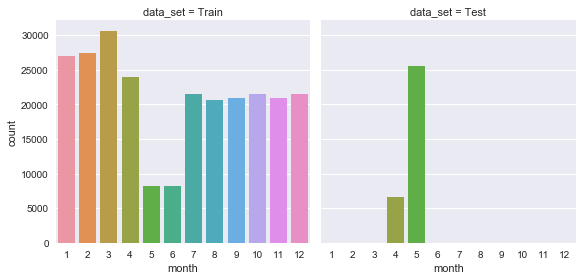

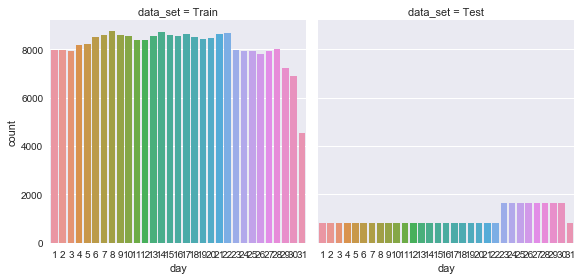

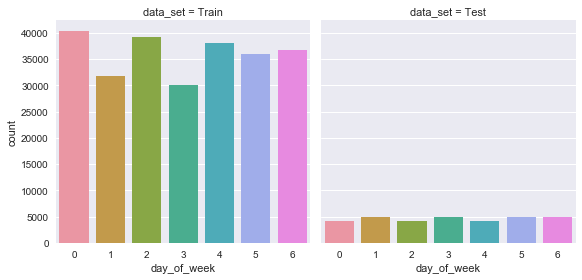

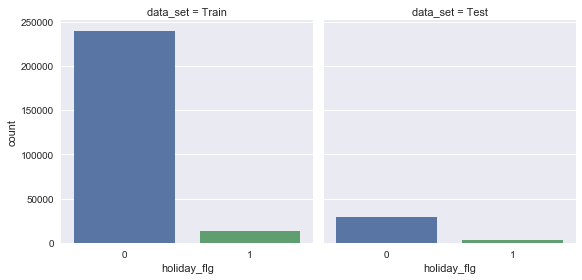

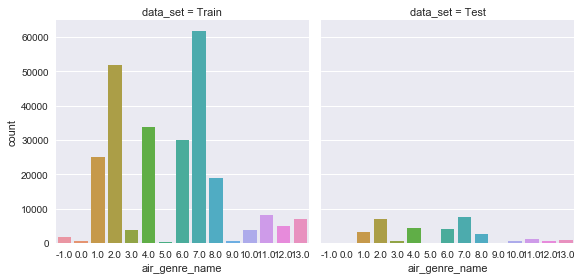

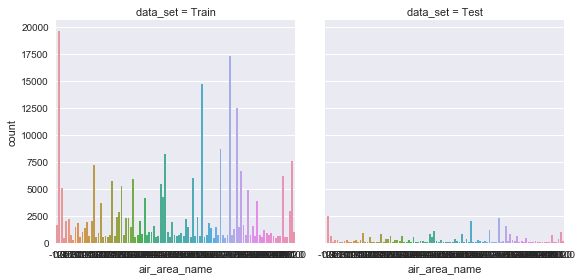

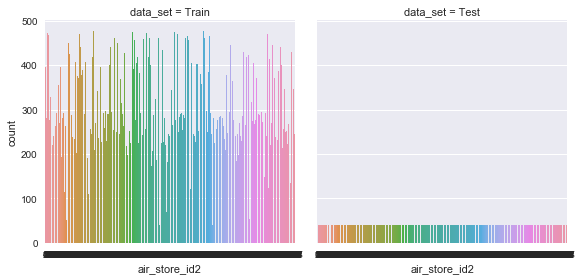

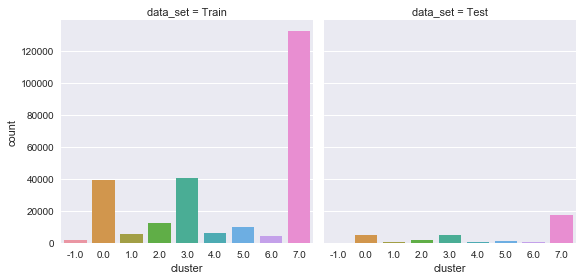

In [20]:
for cat in categorical_vars:
    plt.figure()
    sns.factorplot(x=cat, col='data_set', data=combined, kind="count")

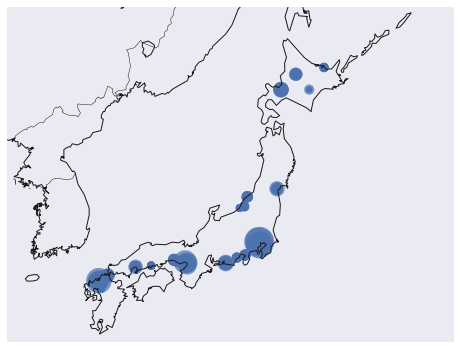

In [42]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='aea',
            lat_0=39., 
            lon_0=138.,
            resolution ='l',
            width=2.4E6, height=1.8E6)
m.drawcoastlines()
m.drawcountries()
# m.shadedrelief()
m.scatter(train.longitude.values, train.latitude.values, latlon=True,
          s=train.visitors.values,
          cmap='Reds', alpha=0.7)
plt.legend()

In [26]:
ts = pd.DataFrame(train[['visit_date', 'air_area_name', 'air_genre_name', 
                         'cluster', 'day_of_week', 'holiday_flg', 'visitors', 'visitor_diff', 'log_visitors', 'log_visitor_diff']])
ts = ts.set_index('visit_date')
ts.index = ts.index.to_datetime()
ts.index.name = 'visit_date'

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)
  after removing the cwd from sys.path.


In [27]:
ts = ts.sort_index()

In [35]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, label):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=14)
    rolstd = pd.rolling_std(timeseries, window=14)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[label], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=14,center=False).mean()
  
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=14,center=False).std()
  import sys


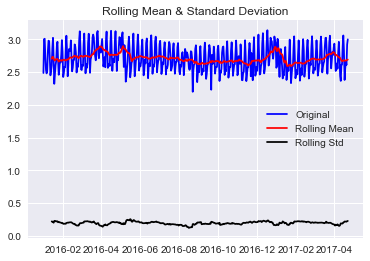

Results of Dickey-Fuller Test:
Test Statistic                  -3.336243
p-value                          0.013334
#Lags Used                      13.000000
Number of Observations Used    464.000000
Critical Value (1%)             -3.444522
Critical Value (5%)             -2.867789
Critical Value (10%)            -2.570099
dtype: float64


In [36]:
test_stationarity(ts[['log_visitors']], 'log_visitors')

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=14,center=False).mean()
  
D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=14,center=False).std()
  import sys


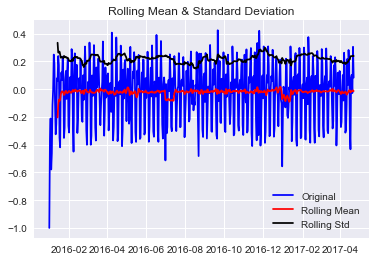

Results of Dickey-Fuller Test:
Test Statistic                -6.222681e+00
p-value                        5.177405e-08
#Lags Used                     1.800000e+01
Number of Observations Used    4.590000e+02
Critical Value (1%)           -3.444677e+00
Critical Value (5%)           -2.867857e+00
Critical Value (10%)          -2.570135e+00
dtype: float64


In [37]:
test_stationarity(ts[['log_visitor_diff']], 'log_visitor_diff')

In [38]:
for i in range(1, 26):
    print("KPSS test for lag = ", i, kpss(ts.log_visitors, lags=i))

KPSS test for lag =  1 (0.5495073167971084, 0.030516370090741346, 1, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  2 (0.53755490340092649, 0.03320835508988142, 2, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  3 (0.60209895023829219, 0.022445549978337073, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  4 (0.72373459305467913, 0.011387764267756442, 4, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  5 (0.87432956900816605, 0.01, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  6 (0.89084725201173842, 0.01, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  7 (0.74604864506950819, 0.01, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  8 (0.62376599754298079, 0.020475818405183564, 8, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  9 (0.56760545

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\tsa\stattools.py:1258: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [39]:
for i in range(1, 26):
    print("KPSS test for lag = ", i, kpss(ts.log_visitor_diff, lags=i))

KPSS test for lag =  1 (0.095068958288188996, 0.1, 1, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  2 (0.11260143131712834, 0.1, 2, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  3 (0.13843179108546341, 0.1, 3, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  4 (0.17860619296425501, 0.1, 4, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  5 (0.28199681542167609, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  6 (0.38289772610270256, 0.08452684219711096, 6, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  7 (0.29304748184258406, 0.1, 7, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  8 (0.23000465212283719, 0.1, 8, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS test for lag =  9 (0.22390577444910637, 0.1, 9, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0

D:\Users\Luis\Programs\Anaconda3\envs\PREDICT-env\lib\site-packages\statsmodels\tsa\stattools.py:1260: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [40]:
from statsmodels.stats.diagnostic import acorr_ljungbox

acorr_ljungbox(ts.log_visitors, lags=25)

(array([  105.98391918,   122.6047872 ,   183.37996644,   233.5483593 ,
          241.21478359,   327.15782863,   604.8641094 ,   660.98778059,
          682.21370755,   737.5080905 ,   784.7779757 ,   796.38329688,
          853.18517116,  1073.88300946,  1118.16010784,  1138.46838784,
         1197.44865089,  1253.29309753,  1269.43171448,  1315.96595501,
         1520.41265002,  1562.86363625,  1581.28934358,  1638.57519761,
         1698.3839182 ]),
 array([  7.43359915e-025,   2.38072225e-027,   1.64252297e-039,
          2.27336012e-049,   4.21395614e-050,   1.23116024e-067,
          2.18279919e-126,   1.78490192e-137,   4.60377306e-141,
          5.54131185e-152,   3.51150376e-161,   9.87001290e-163,
          5.55482108e-174,   2.16954089e-220,   6.11132529e-229,
          2.36974240e-232,   4.62170584e-244,   4.23734155e-255,
          1.25188083e-257,   1.12658685e-266,   1.46742017e-309,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+

In [41]:
acorr_ljungbox(ts.log_visitor_diff, lags=25)

(array([   23.61625731,    99.2411863 ,   117.55001228,   133.77556123,
          189.12232734,   211.83471986,   448.86482719,   461.88619788,
          527.32055414,   541.1345011 ,   554.73161407,   608.03264137,
          625.24281976,   831.55343781,   845.49770605,   898.15531954,
          912.26450945,   927.66760427,   983.20822075,   999.24695807,
         1204.77090024,  1219.85639918,  1267.39407665,  1281.06063547,
         1302.969958  ]),
 array([  1.17589841e-006,   2.81870876e-022,   2.60039357e-025,
          6.06453607e-028,   6.01744505e-039,   5.72505273e-043,
          7.78434285e-093,   1.04882710e-094,   8.08332828e-108,
          7.07082272e-110,   6.66069682e-112,   2.04112991e-122,
          3.17185789e-125,   1.96151319e-168,   1.60924478e-170,
          6.89727328e-181,   5.09858585e-183,   1.96090733e-185,
          2.03575448e-196,   5.65172324e-199,   5.60642360e-242,
          2.58071515e-244,   1.38149512e-253,   1.25750413e-255,
          1.97273150e-

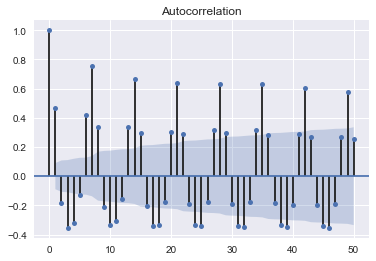

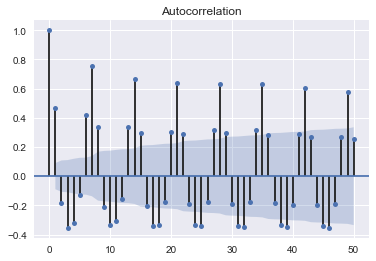

In [42]:
plot_acf(ts.log_visitors, lags=50)

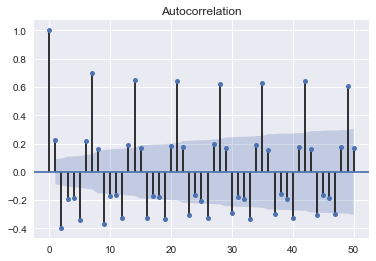

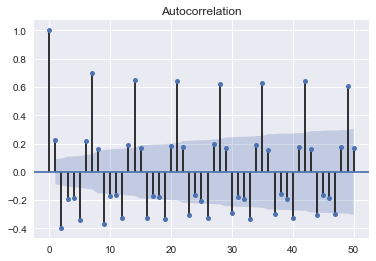

In [43]:
plot_acf(ts.log_visitor_diff, lags=50)

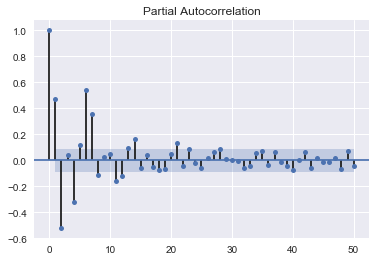

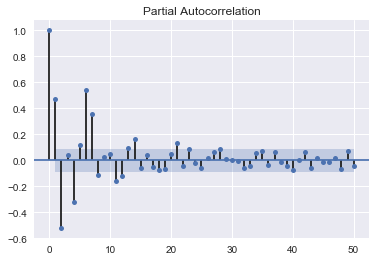

In [44]:
plot_pacf(ts.log_visitors, lags=50)

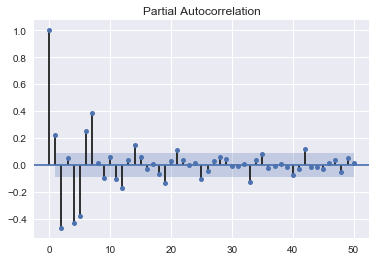

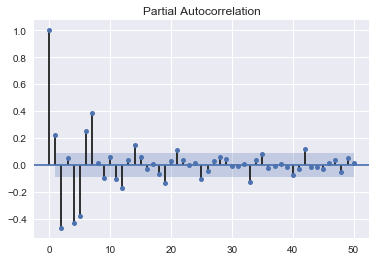

In [45]:
plot_pacf(ts.log_visitor_diff, lags=50)